<a href="https://colab.research.google.com/github/davidcechak/muni_nn_course/blob/main/05_RNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt
!wget https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/test_set_1_1.txt

--2021-12-08 14:03:38--  https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63000000 (60M) [text/plain]
Saving to: ‘train_set_1_1.txt’

train_set_1_1.txt   100%[===================>]  60.08M   172MB/s    in 0.3s    

2021-12-08 14:03:41 (172 MB/s) - ‘train_set_1_1.txt’ saved [63000000/63000000]

--2021-12-08 14:03:41--  https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/test_set_1_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respons

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
nucleo_dic = {
    "A": 0,
    "C": 1,
    "T": 2,
    "G": 3,
    "N": 4,
}
def create_dataset_from_txt(filename, limit):
  df = pd.read_csv(filename, sep='\t', names=['sequence', 'label'])

  labels = np.array(list(map((lambda x: 1 if x == 'positive' else 0), list(df['label']))))[:limit]
  data_list = df['sequence'].tolist()

  dataset_numeric = [[nucleo_dic[letter] for letter in sequence] for sequence in data_list][:limit] 
  dataset_onehot = tf.one_hot(dataset_numeric, depth=5)

  dataset = tf.data.Dataset.from_tensor_slices((dataset_onehot, labels))
  return dataset.shuffle(buffer_size=10000).batch(batch_size=256)


train_dataset = create_dataset_from_txt("train_set_1_1.txt", limit=30000)
valid_dataset = create_dataset_from_txt("test_set_1_1.txt", limit=10000)


In [3]:
for x,y in train_dataset.take(1):
  print(x.shape, x)
  print(y.shape, y)


(256, 200, 5) tf.Tensor(
[[[0. 0. 0. 1. 0.]
  [0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0.]
  ...
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  ...
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0.]]

 ...

 [[0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  ...
  [1. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0.]
  [1. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  ...
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 1.]]

 [[1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0.]
  ...
  [0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0.]]], shape=(256, 200, 5), dtype=float32)
(256,) tf.Tensor(
[1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20, validation_data=valid_dataset)

Epoch 1/20
118/118 [==============================] - 26s 193ms/step - loss: 0.5937 - accuracy: 0.6912 - val_loss: 0.6772 - val_accuracy: 0.5816
Epoch 2/20
118/118 [==============================] - 23s 195ms/step - loss: 0.6680 - accuracy: 0.5835 - val_loss: 0.6666 - val_accuracy: 0.5831
Epoch 3/20
118/118 [==============================] - 23s 195ms/step - loss: 0.6525 - accuracy: 0.5975 - val_loss: 0.5848 - val_accuracy: 0.7195
Epoch 4/20
118/118 [==============================] - 23s 196ms/step - loss: 0.6360 - accuracy: 0.6488 - val_loss: 0.6086 - val_accuracy: 0.6425
Epoch 5/20
118/118 [==============================] - 23s 194ms/step - loss: 0.5446 - accuracy: 0.7437 - val_loss: 0.6763 - val_accuracy: 0.5642
Epoch 6/20
118/118 [==============================] - 23s 196ms/step - loss: 0.6708 - accuracy: 0.5730 - val_loss: 0.6587 - val_accuracy: 0.5913
Epoch 7/20
118/118 [==============================] - 23s 195ms/step - loss: 0.6218 - accuracy: 0.6700 - val_loss: 0.5475 - val_ac

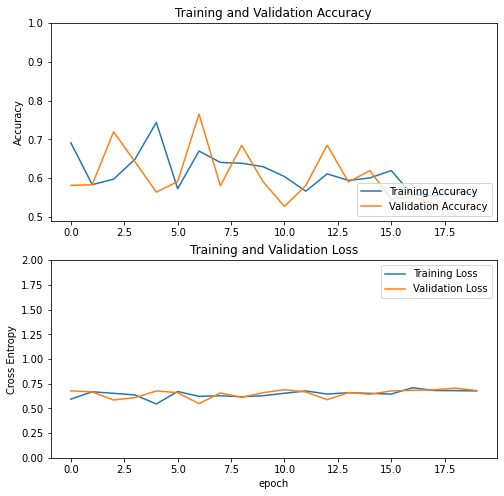

In [5]:
def plot_metrics(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,2.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

plot_metrics(history)

LSTM (slides)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
118/118 [==============================] - 11s 54ms/step - loss: 0.4928 - accuracy: 0.7788 - val_loss: 0.5332 - val_accuracy: 0.7185
Epoch 2/10
118/118 [==============================] - 6s 47ms/step - loss: 0.5404 - accuracy: 0.7168 - val_loss: 0.6005 - val_accuracy: 0.6514
Epoch 3/10
118/118 [==============================] - 6s 49ms/step - loss: 0.5706 - accuracy: 0.6762 - val_loss: 0.5489 - val_accuracy: 0.6814
Epoch 4/10
118/118 [==============================] - 6s 48ms/step - loss: 0.5597 - accuracy: 0.6863 - val_loss: 0.5677 - val_accuracy: 0.6578
Epoch 5/10
118/118 [==============================] - 6s 49ms/step - loss: 0.5369 - accuracy: 0.6996 - val_loss: 0.5512 - val_accuracy: 0.6998
Epoch 6/10
118/118 [==============================] - 6s 48ms/step - loss: 0.5169 - accuracy: 0.7543 - val_loss: 0.6233 - val_accuracy: 0.6630
Epoch 7/10
118/118 [==============================] - 6s 47ms/step - loss: 0.5536 - accuracy: 0.6761 - val_loss: 0.5587 - val_accuracy: 0.729

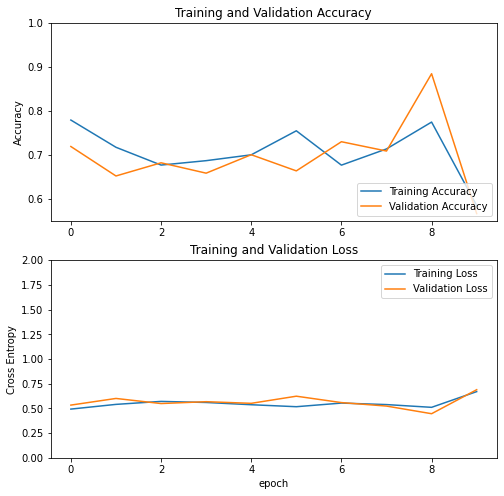

In [7]:
plot_metrics(history)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # <---  change in learning rate, default is 0.001 https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
118/118 [==============================] - 8s 52ms/step - loss: 0.6787 - accuracy: 0.5897 - val_loss: 0.6329 - val_accuracy: 0.6742
Epoch 2/10
118/118 [==============================] - 5s 46ms/step - loss: 0.4260 - accuracy: 0.8333 - val_loss: 0.3330 - val_accuracy: 0.8791
Epoch 3/10
118/118 [==============================] - 5s 46ms/step - loss: 0.3156 - accuracy: 0.8864 - val_loss: 0.2884 - val_accuracy: 0.8976
Epoch 4/10
118/118 [==============================] - 5s 46ms/step - loss: 0.2837 - accuracy: 0.9017 - val_loss: 0.2629 - val_accuracy: 0.9099
Epoch 5/10
118/118 [==============================] - 5s 45ms/step - loss: 0.2698 - accuracy: 0.9071 - val_loss: 0.2568 - val_accuracy: 0.9145
Epoch 6/10
118/118 [==============================] - 5s 45ms/step - loss: 0.2638 - accuracy: 0.9100 - val_loss: 0.2499 - val_accuracy: 0.9170
Epoch 7/10
118/118 [==============================] - 5s 45ms/step - loss: 0.2505 - accuracy: 0.9175 - val_loss: 0.2346 - val_accuracy: 0.9220

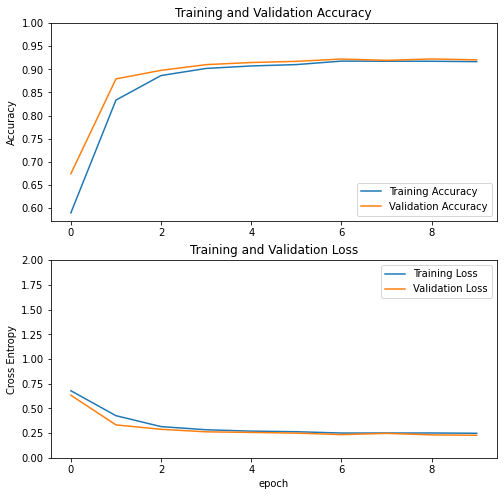

In [9]:
plot_metrics(history)


Bidirectional LSTM

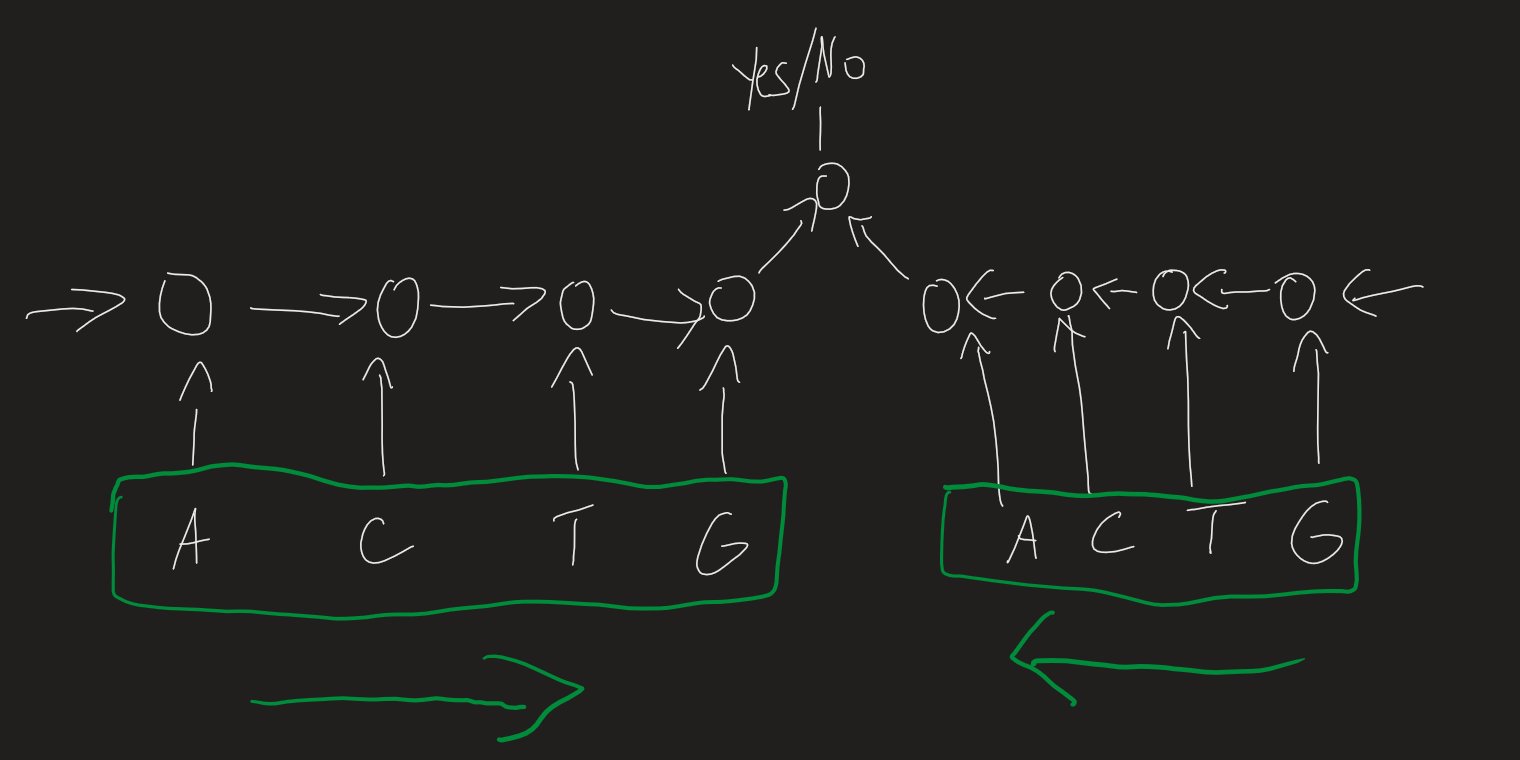

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)


Epoch 1/10
118/118 [==============================] - 18s 114ms/step - loss: 0.6733 - accuracy: 0.5902 - val_loss: 0.6114 - val_accuracy: 0.6978
Epoch 2/10
118/118 [==============================] - 12s 98ms/step - loss: 0.4302 - accuracy: 0.8188 - val_loss: 0.3117 - val_accuracy: 0.8930
Epoch 3/10
118/118 [==============================] - 12s 103ms/step - loss: 0.3016 - accuracy: 0.8951 - val_loss: 0.2649 - val_accuracy: 0.9155
Epoch 4/10
118/118 [==============================] - 12s 101ms/step - loss: 0.2809 - accuracy: 0.9054 - val_loss: 0.2516 - val_accuracy: 0.9216
Epoch 5/10
118/118 [==============================] - 12s 101ms/step - loss: 0.2635 - accuracy: 0.9146 - val_loss: 0.2444 - val_accuracy: 0.9253
Epoch 6/10
118/118 [==============================] - 12s 97ms/step - loss: 0.2513 - accuracy: 0.9174 - val_loss: 0.2291 - val_accuracy: 0.9221
Epoch 7/10
118/118 [==============================] - 12s 98ms/step - loss: 0.2532 - accuracy: 0.9127 - val_loss: 0.2254 - val_accur

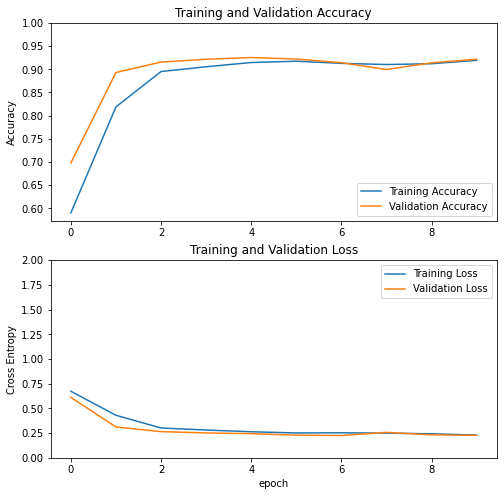

In [11]:
plot_metrics(history)